In [2]:
#importing all the packages that I might need
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 300)
from scipy.stats import norm

In [3]:
data_grad = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='All',header=8)
data_ell = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='ELL',header=8)
data_swd = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='SWD',header=8)
data_ethnicity = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Ethnicity',header=8)
data_gender = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Gender',header=8)
data_poverty = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Poverty',header=8)

In [4]:
df_created = [data_ell,data_swd,data_ethnicity,data_gender,data_poverty]

In [5]:
data_grad.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,All Students,2014,4 year August,29,28,0.965517,25,86.2069,89.2857,0,0,0,25,86.2069,89.2857,3,10.3448,10.7143,0,0,1,3.44828
1,01M292,Orchard Collegiate Academy,All Students,2013,4 year August,36,25,0.694444,23,63.8889,92,0,0,0,23,63.8889,92,2,5.55556,8,3,8.33333,7,19.4444
2,01M292,Orchard Collegiate Academy,All Students,2012,4 year August,44,24,0.545455,20,45.4545,83.3333,1,2.27273,4.16667,19,43.1818,79.1667,4,9.09091,16.6667,10,22.7273,10,22.7273
3,01M292,Orchard Collegiate Academy,All Students,2011,4 year August,73,46,0.630137,41,56.1644,89.1304,0,0,0,41,56.1644,89.1304,5,6.84932,10.8696,18,24.6575,7,9.58904
4,01M292,Orchard Collegiate Academy,All Students,2010,4 year August,61,26,0.426230,26,42.623,100,1,1.63934,3.84615,25,40.9836,96.1538,0,0,0,18,29.5082,17,27.8689


In [47]:
data_grad.columns

Index(['DBN', 'School Name', 'Category', 'Cohort Year', 'Cohort', '#', '#.1',
       '% of cohort', '#.2', '% of cohort.1', '% of grads', '#.3',
       '% of cohort.2', '% of grads.1', '#.4', '% of cohort.3', '% of grads.2',
       '#.5', '% of cohort.4', '% of grads.3', '#.6', '% of cohort.5', '#.7',
       '% of cohort.6'],
      dtype='object')

In [48]:
data_ell.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,ELL,2014,4 year August,1,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
1,01M292,Orchard Collegiate Academy,ELL,2013,4 year August,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
2,01M292,Orchard Collegiate Academy,ELL,2012,4 year August,6,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
3,01M292,Orchard Collegiate Academy,ELL,2011,4 year August,14,3,21.4286,1,7.14286,33.3333,0,0,0,1,7.14286,33.3333,2,14.2857,66.6667,8,57.1429,2,14.2857
4,01M292,Orchard Collegiate Academy,ELL,2010,4 year August,14,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s


In [49]:
data_swd.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,Not SWD,2014,4 year August,21,21,100,21,100,100,0,0,0,21,100,100,0,0,0,0,0,0,0
1,01M292,Orchard Collegiate Academy,Not SWD,2013,4 year August,24,19,79.1667,19,79.1667,100,0,0,0,19,79.1667,100,0,0,0,1,4.16667,4,16.6667
2,01M292,Orchard Collegiate Academy,Not SWD,2012,4 year August,31,19,61.2903,18,58.0645,94.7368,1,3.22581,5.26316,17,54.8387,89.4737,1,3.22581,5.26316,5,16.129,7,22.5806
3,01M292,Orchard Collegiate Academy,Not SWD,2011,4 year August,53,39,73.5849,38,71.6981,97.4359,0,0,0,38,71.6981,97.4359,1,1.88679,2.5641,10,18.8679,3,5.66038
4,01M292,Orchard Collegiate Academy,Not SWD,2010,4 year August,47,25,53.1915,25,53.1915,100,1,2.12766,4,24,51.0638,96,0,0,0,10,21.2766,12,25.5319


In [50]:
data_ethnicity.tail()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
98095,32K564,Bushwick Community High School,White,2006,6 year June,5,2,40,0,0,0,0,0,0,0,0,0,2,40,100,0,0,2,40
98096,32K564,Bushwick Community High School,White,2005,6 year June,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
98097,32K564,Bushwick Community High School,White,2003,6 year June,1,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
98098,32K564,Bushwick Community High School,White,2002,6 year June,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
98099,32K564,Bushwick Community High School,White,2001,6 year June,2,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s


In [6]:
data_grad_2014 = data_grad[data_grad['Cohort Year'] == 2014]
data_grad_2014 = data_grad_2014[data_grad_2014['Cohort'] == '4 year August']

In [7]:
data_grad_2014.sample(10)

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
4821,04M435,Manhattan Center for Science and Mathematics,All Students,2014,4 year August,381,374,0.981627,364,95.5381,97.3262,258,67.7165,68.984,106,27.8215,28.3422,10,2.62467,2.6738,6,1.5748,1,0.262467
23165,31R440,New Dorp High School,All Students,2014,4 year August,738,611,0.827913,531,71.9512,86.9067,179,24.2547,29.2962,352,47.6965,57.6105,80,10.8401,13.0933,78,10.5691,36,4.87805
20218,25Q460,Flushing High School,All Students,2014,4 year August,382,238,0.623037,214,56.0209,89.916,21,5.49738,8.82353,193,50.5236,81.0924,24,6.28272,10.084,72,18.8482,66,17.2775
20908,27Q302,"Queens High School for Information, Research, ...",All Students,2014,4 year August,92,77,0.836957,70,76.087,90.9091,14,15.2174,18.1818,56,60.8696,72.7273,7,7.6087,9.09091,2,2.17391,13,14.1304
4743,04M372,Esperanza Preparatory Academy,All Students,2014,4 year August,84,55,0.654762,50,59.5238,90.9091,1,1.19048,1.81818,49,58.3333,89.0909,5,5.95238,9.09091,19,22.619,6,7.14286
20559,26Q430,Francis Lewis High School,All Students,2014,4 year August,1180,1034,0.876271,992,84.0678,95.9381,606,51.3559,58.6073,386,32.7119,37.3308,42,3.55932,4.0619,90,7.62712,43,3.64407
1649,02M414,N.Y.C. Museum School,All Students,2014,4 year August,114,112,0.982456,110,96.4912,98.2143,53,46.4912,47.3214,57,50,50.8929,2,1.75439,1.78571,0,0,1,0.877193
165,01M458,Forsyth Satellite Academy,All Students,2014,4 year August,73,27,0.369863,25,34.2466,92.5926,0,0,0,25,34.2466,92.5926,2,2.73973,7.40741,34,46.5753,12,16.4384
16106,17K590,Medgar Evers College Preparatory School,All Students,2014,4 year August,207,202,0.975845,199,96.1353,98.5149,45,21.7391,22.2772,154,74.3961,76.2376,3,1.44928,1.48515,4,1.93237,0,0
15301,17K408,Academy of Hospitality and Tourism,All Students,2014,4 year August,50,44,0.880000,36,72,81.8182,0,0,0,36,72,81.8182,8,16,18.1818,2,4,4,8


In [53]:
len(data_grad_2014)

479

In [8]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']].reset_index()
data_grad_2014.head()

,index,DBN,School Name,#,% of cohort
0,0,01M292,Orchard Collegiate Academy,29,0.965517
1,51,01M448,University Neighborhood High School,88,0.931818
2,108,01M450,East Side Community School,92,0.967391
3,165,01M458,Forsyth Satellite Academy,73,0.369863
4,205,01M509,Marta Valle High School,42,0.642857


In [9]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']]
data_grad_2014.head()

,DBN,School Name,#,% of cohort
0,01M292,Orchard Collegiate Academy,29,0.965517
1,01M448,University Neighborhood High School,88,0.931818
2,01M450,East Side Community School,92,0.967391
3,01M458,Forsyth Satellite Academy,73,0.369863
4,01M509,Marta Valle High School,42,0.642857


In [56]:
data_ell.tail()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
57745,32K564,Bushwick Community High School,Not ELL,2005,6 year June,199,61,30.6533,24,12.0603,39.3443,0,0,0,24,12.0603,39.3443,37,18.593,60.6557,26,13.0653,108,54.2714
57746,32K564,Bushwick Community High School,Not ELL,2004,6 year June,178,47,26.4045,14,7.86517,29.7872,0,0,0,14,7.86517,29.7872,33,18.5393,70.2128,27,15.1685,97,54.4944
57747,32K564,Bushwick Community High School,Not ELL,2003,6 year June,137,40,29.1971,5,3.64964,12.5,0,0,0,5,3.64964,12.5,35,25.5474,87.5,17,12.4088,79,57.6642
57748,32K564,Bushwick Community High School,Not ELL,2002,6 year June,170,58,34.1176,1,0.588235,1.72414,0,0,0,1,0.588235,1.72414,57,33.5294,98.2759,24,14.1176,87,51.1765
57749,32K564,Bushwick Community High School,Not ELL,2001,6 year June,148,59,39.8649,0,0,0,0,0,0,0,0,0,59,39.8649,100,18,12.1622,69,46.6216


In [10]:
#Create a function to clean the dataframes from the different excel sheets

def my_cleaner(dataframe):
#select year 2014 and cohort 4 year August
    dataframe = dataframe[dataframe['Cohort Year'] == 2014]
    dataframe = dataframe[dataframe['Cohort'] == '4 year August']
#keep only 3 columns from the dataframes  
    cols = [col for col in dataframe.columns if col in ['DBN','Category','#']]
    dataframe = dataframe[cols]
#transform the categories into columns
    dataframe = dataframe.groupby(['DBN','Category'])['#'].aggregate('first').unstack()
#due to columns removal - reset the index
    dataframe = dataframe.reset_index()
    return dataframe

In [58]:
data_ell.sample(5)

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,% of grads,#.3,% of cohort.2,% of grads.1,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
35389,15K497,The Boerum Hill School for International Studies,ELL,2001,4 year June,8,1,12.5,0,0,0,0,0,0,0,0,0,1,12.5,100,7,87.5,0,0
41849,19K615,Transit Tech Career and Technical Education Hi...,ELL,2010,6 year June,3,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
28702,12X245,NEW DAY ACADEMY,Not ELL,2004,4 year June,5,0,0,0,0,NaN,0,0,NaN,0,0,NaN,0,0,NaN,4,80,1,20
39295,18K415,SAMUEL J TILDEN HS,Former ELL,2005,4 year August,5,3,60,2,40,66.6667,0,0,0,2,40,66.6667,1,20,33.3333,1,20,1,20
48993,25Q540,Queens Academy High School,Former ELL,2009,5 year June,5,2,40,2,40,100,0,0,0,2,40,100,0,0,0,0,0,3,60


In [59]:
test = my_cleaner(data_ell)

In [60]:
test.sample(5)

Category,DBN,ELL,Former ELL,Not ELL
392,25Q241,4.0,24.0,73.0
80,03M402,12.0,5.0,68.0
401,25Q670,14.0,16.0,153.0
105,05M369,NaN,1.0,74.0
63,02M545,NaN,32.0,67.0


In [12]:
dataframes_to_merge=[my_cleaner(df) for df in df_created]
len(dataframes_to_merge)

5

In [13]:
dataset = data_grad_2014
for x in range(5):
    dataset = dataset.merge(dataframes_to_merge[x],on = 'DBN',how = 'inner')

In [63]:
dataset.sample(5)

,DBN,School Name,#,% of cohort,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
6,01M539,"New Explorations into Science, Technology and ...",131,0.938931,NaN,6.0,125.0,125.0,6.0,45.0,14.0,28.0,5.0,NaN,39.0,65.0,66.0,62.0,69.0
272,14K561,Williamsburg Preparatory School,157,0.955414,2.0,4.0,151.0,138.0,19.0,7.0,27.0,103.0,NaN,3.0,17.0,68.0,89.0,119.0,38.0
443,29Q272,George Washington Carver High School for the S...,143,0.748252,7.0,4.0,132.0,124.0,19.0,10.0,111.0,17.0,NaN,4.0,1.0,75.0,68.0,112.0,31.0
21,02M308,Lower Manhattan Arts Academy,78,0.833333,NaN,2.0,76.0,51.0,27.0,7.0,21.0,43.0,4.0,1.0,2.0,54.0,24.0,59.0,19.0
151,08X405,Herbert H. Lehman High School,183,0.573770,28.0,11.0,144.0,137.0,46.0,29.0,26.0,105.0,NaN,NaN,23.0,74.0,109.0,143.0,40.0


In [64]:
len(dataset)

479

In [14]:
dataset = dataset.rename(columns={'#':'total_stud','% of cohort':'grad_rate'})

In [66]:
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0


In [67]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
count,479.000000,475.000000,388.000000,419.000000,479.000000,478.000000,469.000000,401.000000,471.000000,475.000000,242.000000,230.000000,405.000000,476.000000,468.000000,479.000000,474.000000
mean,150.513570,0.741041,16.092784,11.579952,127.348643,127.420502,23.857143,32.344140,41.050955,59.298947,4.049587,2.782609,24.701235,74.199580,78.583333,112.469729,38.445148
std,179.989735,0.229672,26.756663,18.817435,159.607015,161.375680,24.016173,86.267846,38.718591,58.126908,5.621316,4.330823,67.081760,88.841409,97.258940,126.245206,66.273651
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,79.000000,0.677836,3.000000,3.000000,63.000000,64.000000,12.000000,2.000000,18.000000,22.500000,1.000000,1.000000,2.000000,35.000000,38.000000,61.500000,10.000000
50%,99.000000,0.795082,6.000000,5.000000,86.000000,80.500000,19.000000,6.000000,30.000000,48.000000,2.000000,2.000000,4.000000,49.000000,50.000000,80.000000,18.000000
75%,126.000000,0.901220,16.000000,11.000000,114.000000,107.750000,26.000000,23.000000,50.500000,71.500000,4.000000,3.000000,18.000000,68.000000,69.000000,100.000000,34.750000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,39.000000,37.000000,808.000000,577.000000,800.000000,861.000000,645.000000


In [68]:
dataset.dtypes

DBN                 object
School Name         object
total_stud           int64
grad_rate          float64
ELL                float64
Former ELL         float64
Not ELL            float64
Not SWD            float64
SWD                float64
Asian              float64
Black              float64
Hispanic           float64
Multi-Racial       float64
Native American    float64
White              float64
Female             float64
Male               float64
Econ Disadv        float64
Not Econ Disadv    float64
dtype: object

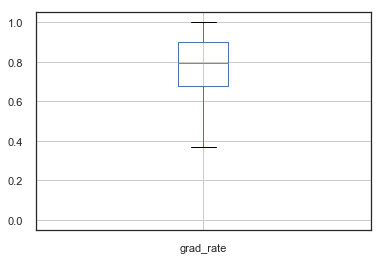

In [15]:
dataset.boxplot(['grad_rate'])

In [16]:
#remove missing or incorrect value in grad_rate to keep only numeric
dataset=dataset[pd.to_numeric(dataset.grad_rate, errors='coerce').notnull()]

In [70]:
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0


In [71]:
len(dataset)

475

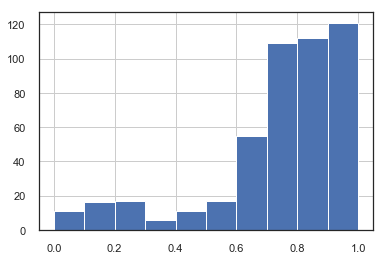

In [17]:
dataset.grad_rate.hist()

In [18]:
dataset.grad_rate.describe()

count    475.000000
mean       0.741041
std        0.229672
min        0.000000
25%        0.677836
50%        0.795082
75%        0.901220
max        1.000000
Name: grad_rate, dtype: float64

In [19]:
columns_tobe_changed = list(dataset.columns)[4:]
columns_tobe_changed

['ELL',
 'Former ELL',
 'Not ELL',
 'Not SWD',
 'SWD',
 'Asian',
 'Black',
 'Hispanic',
 'Multi-Racial',
 'Native American',
 'White',
 'Female',
 'Male',
 'Econ Disadv',
 'Not Econ Disadv']

In [20]:
new_cols = ['prob_'+x for x in columns_tobe_changed]
new_cols

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

In [21]:
dataset[new_cols] = round(dataset[columns_tobe_changed].div(dataset.total_stud, axis=0),2)
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0,0.03,0.10,0.86,0.72,0.28,0.10,0.21,0.66,NaN,NaN,0.03,0.21,0.79,0.93,0.07
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0,0.01,0.10,0.89,0.85,0.15,0.26,0.22,0.48,0.01,0.01,0.02,0.43,0.57,0.88,0.12
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0,NaN,0.01,0.99,0.83,0.17,0.08,0.21,0.57,0.04,NaN,0.11,0.43,0.57,0.67,0.33
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0,0.08,0.05,0.86,0.77,0.23,0.01,0.34,0.56,0.01,NaN,0.07,0.64,0.36,0.89,0.11
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0,0.05,0.02,0.93,0.60,0.40,0.05,0.29,0.64,NaN,NaN,0.02,0.48,0.52,0.98,0.02


In [77]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
count,475.000000,475.000000,388.000000,419.000000,475.000000,475.000000,468.000000,401.000000,467.000000,474.000000,242.000000,230.000000,405.000000,472.000000,467.000000,475.000000,474.000000,388.000000,419.000000,475.000000,475.000000,468.000000,401.000000,467.000000,474.000000,242.000000,230.000000,405.000000,472.000000,467.000000,475.000000,474.000000
mean,151.766316,0.741041,16.092784,11.579952,128.406316,128.212632,23.905983,32.344140,41.389722,59.421941,4.049587,2.782609,24.701235,74.817797,78.747323,113.402105,38.445148,0.119897,0.074916,0.836253,0.819853,0.182842,0.119352,0.350642,0.448165,0.025083,0.018565,0.100148,0.498602,0.513169,0.785916,0.214536
std,180.225826,0.229672,26.756663,18.817435,159.859673,161.575782,24.018545,86.267846,38.709800,58.126413,5.621316,4.330823,67.081760,88.962054,97.298446,126.364604,66.273651,0.158682,0.085757,0.208849,0.091447,0.089411,0.146856,0.245137,0.245225,0.022282,0.022932,0.134578,0.140571,0.130824,0.137550,0.137342
min,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.010000,0.400000,0.000000,0.010000,0.000000,0.030000,0.000000,0.000000,0.000000,0.060000,0.070000,0.210000,0.010000
25%,79.000000,0.677836,3.000000,3.000000,64.000000,65.000000,12.000000,2.000000,18.000000,23.000000,1.000000,1.000000,2.000000,35.000000,38.000000,62.000000,10.000000,0.030000,0.030000,0.810000,0.760000,0.130000,0.020000,0.170000,0.230000,0.010000,0.010000,0.020000,0.430000,0.440000,0.740000,0.120000
50%,100.000000,0.795082,6.000000,5.000000,86.000000,81.000000,19.000000,6.000000,30.000000,48.000000,2.000000,2.000000,4.000000,49.000000,50.000000,80.000000,18.000000,0.060000,0.050000,0.900000,0.820000,0.180000,0.060000,0.280000,0.460000,0.020000,0.010000,0.040000,0.490000,0.510000,0.810000,0.190000
75%,126.500000,0.901220,16.000000,11.000000,114.000000,108.000000,26.000000,23.000000,51.000000,71.750000,4.000000,3.000000,18.000000,68.500000,69.000000,100.000000,34.750000,0.130000,0.090000,0.960000,0.880000,0.240000,0.150000,0.470000,0.640000,0.030000,0.020000,0.120000,0.570000,0.580000,0.880000,0.260000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,39.000000,37.000000,808.000000,577.000000,800.000000,861.000000,645.000000,0.850000,0.600000,1.000000,1.000000,0.600000,0.880000,0.960000,1.000000,0.200000,0.280000,0.790000,1.000000,1.000000,1.000000,0.790000


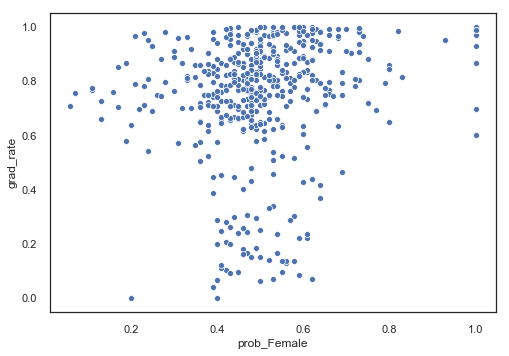

In [78]:
sns.scatterplot(dataset['prob_Female'], dataset.grad_rate)

In [22]:
new_cols

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

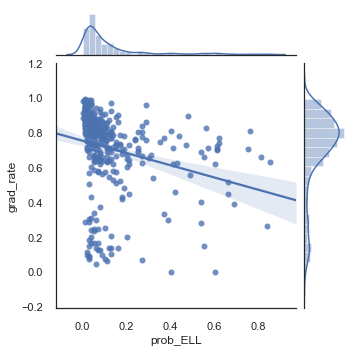

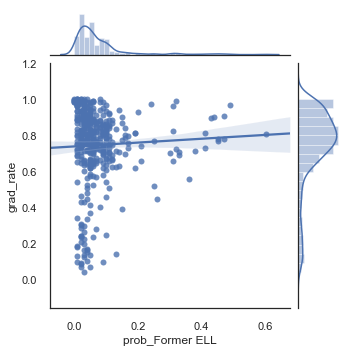

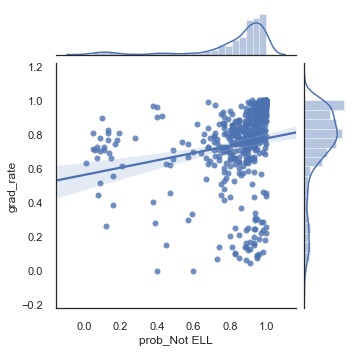

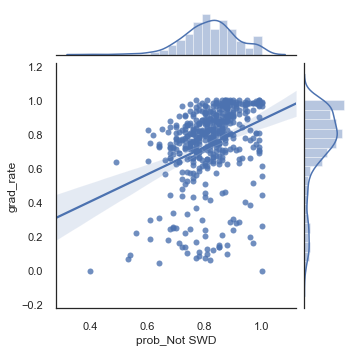

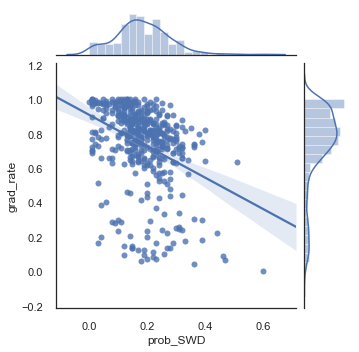

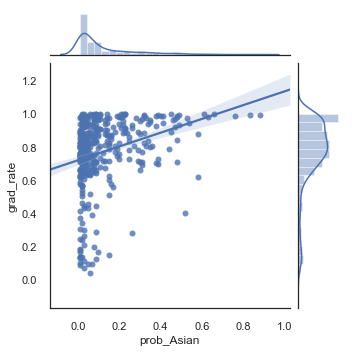

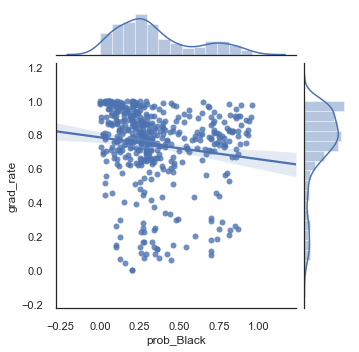

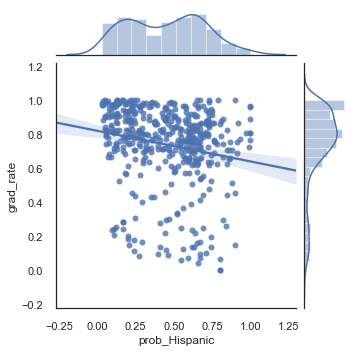

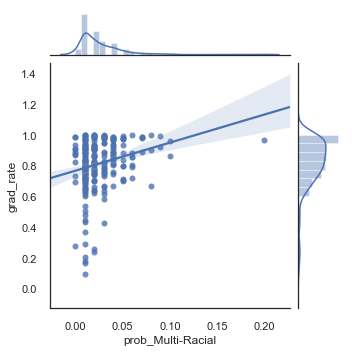

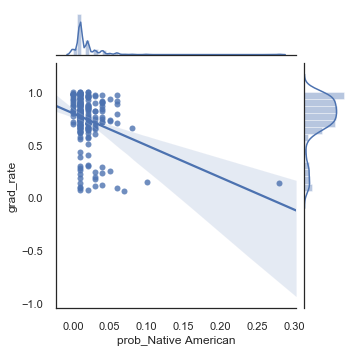

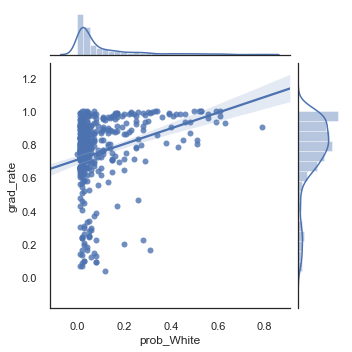

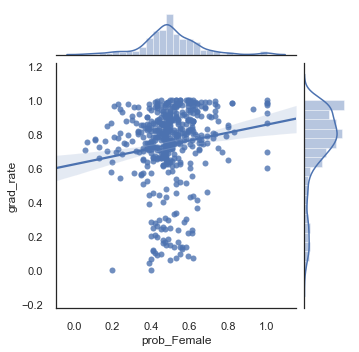

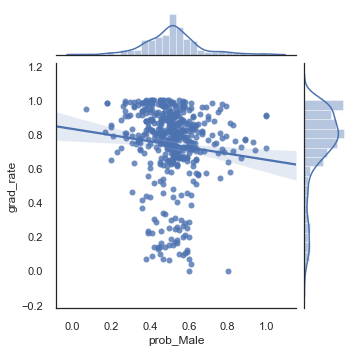

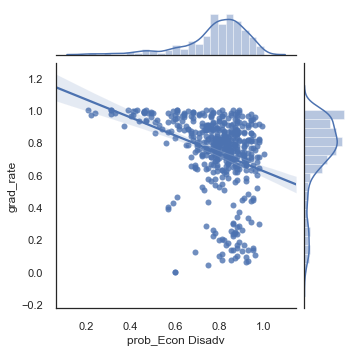

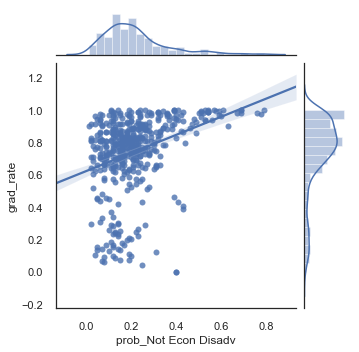

In [23]:
for col in new_cols:
    sns.jointplot(x=col, y='grad_rate', data=dataset, kind="reg",height=5)

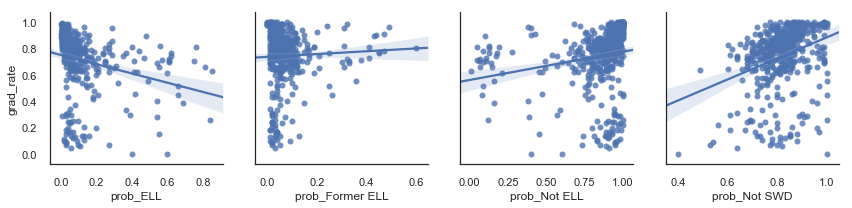

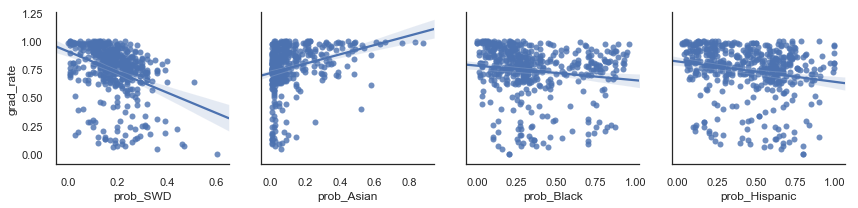

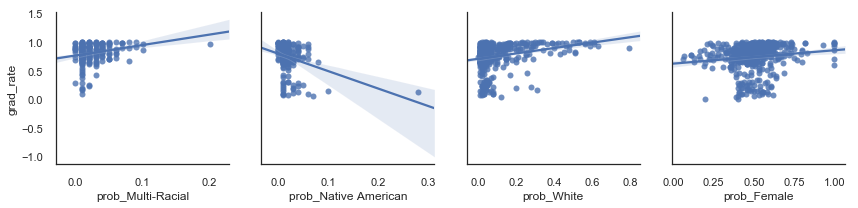

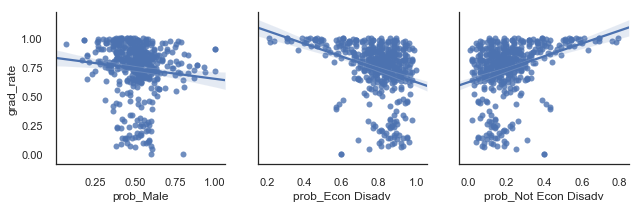

In [24]:
n = 4
row_groups= [new_cols[i:i+n] for i in range(0, len(new_cols), n) ]
for i in row_groups:
    pp = sns.pairplot(data=dataset, y_vars=['grad_rate'],x_vars=i, kind="reg", height=3)

In [67]:
dataset.to_csv("dataset.csv")

In [25]:
# two rows have grad rate of 0%.  Removing them
dataset[dataset['grad_rate'] == 0]

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv,prob_ELL,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
130,07X520,FOREIGN LANGUAGE ACADEMY OF GLOBAL STUDIES,5,0.0,3.0,NaN,2.0,5.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,1.0,4.0,3.0,2.0,0.6,NaN,0.4,1.0,NaN,NaN,0.2,0.8,NaN,NaN,NaN,0.2,0.8,0.6,0.4
167,09X276,LEADERSHIP INSTITUTE,5,0.0,2.0,NaN,3.0,2.0,3.0,NaN,1.0,4.0,NaN,NaN,NaN,2.0,3.0,3.0,2.0,0.4,NaN,0.6,0.4,0.6,NaN,0.2,0.8,NaN,NaN,NaN,0.4,0.6,0.6,0.4


In [26]:
d = dataset[dataset['grad_rate'] > 0]
len(dataset)-len(d)

2

In [118]:
d.grad_rate.describe()

count    473.000000
mean       0.744174
std        0.225025
min        0.041667
25%        0.684783
50%        0.795620
75%        0.902439
max        1.000000
Name: grad_rate, dtype: float64

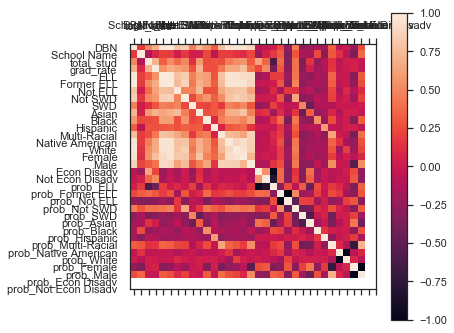

In [85]:
plt.matshow(d.corr())
plt.xticks(range(len(d.columns)), d.columns)
plt.yticks(range(len(d.columns)), d.columns)
plt.colorbar()
plt.show()

In [27]:
d.columns

Index(['DBN', 'School Name', 'total_stud', 'grad_rate', 'ELL', 'Former ELL',
       'Not ELL', 'Not SWD', 'SWD', 'Asian', 'Black', 'Hispanic',
       'Multi-Racial', 'Native American', 'White', 'Female', 'Male',
       'Econ Disadv', 'Not Econ Disadv', 'prob_ELL', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Multi-Racial', 'prob_Native American',
       'prob_White', 'prob_Female', 'prob_Male', 'prob_Econ Disadv',
       'prob_Not Econ Disadv'],
      dtype='object')

In [28]:
filtered_cols_d = [
'total_stud', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic',
       'prob_White', 'prob_Female', 'prob_Male'
]

In [29]:
#Replace missing value with 0
d = d.fillna(0)

features_model = sm.OLS(endog=d['grad_rate'], exog=sm.add_constant(d[filtered_cols_d]) ).fit()
features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     18.54
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           1.22e-28
Time:                        12:54:36   Log-Likelihood:                 114.65
No. Observations:                 473   AIC:                            -207.3
Df Residuals:                     462   BIC:                            -161.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.6419     19.258     -0.241      0.810     -42.486      33.202
total_stud      -3.693e-05   5.76e-05     -0.641      0.522      -0.000    7.63e-05
prob_Former ELL     1.1508      0.182      6.341      0.000       0.794       1.508
prob_Not ELL        0.6917      0.079      8.799      0.000       0.537       0.846
prob_Not SWD        0.7459      0.127      5.895      0.000       0.497       0.995
prob_Asian          0.4426      0.362      1.221      0.223      -0.269       1.155
prob_Black          0.2254      0.343      0.657      0.511      -0.448       0.899
prob_Hispanic       0.3062      0.342      0.894      0.372      -0.367       0.979
prob_White          0.4790      0.348      1.378      0.169      -0.204       1.162
prob_Female         3.8280     19.253      0.199      0.842     -34.007      41.663
prob_Male           3.8199     19.255      0.198      0.843     -34.018      41.658
==============================================================================
Omnibus:                      164.892   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.680
Skew:                          -1.744   Prob(JB):                     4.08e-95
Kurtosis:                       6.144   Cond. No.                     8.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# for col in filtered_cols:
#     sns.jointplot(x=col, y='grad_log', data=dataset, kind="reg",height=5)

In [30]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

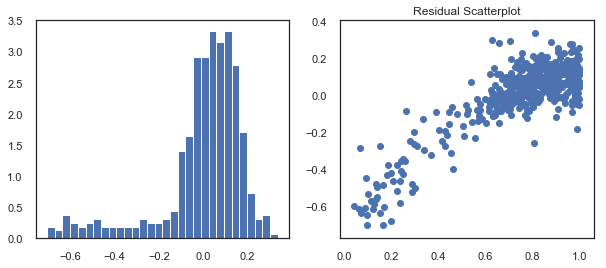

In [31]:
# same as above, except removed the two zeros
checkresiduals(d, 'grad_rate', features_model)

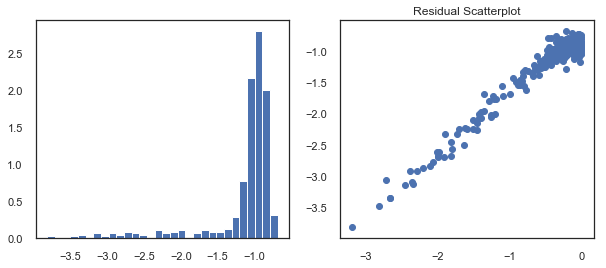

In [32]:
d['grad_log'] = np.log(d['grad_rate'])
checkresiduals(d, 'grad_log', features_model)

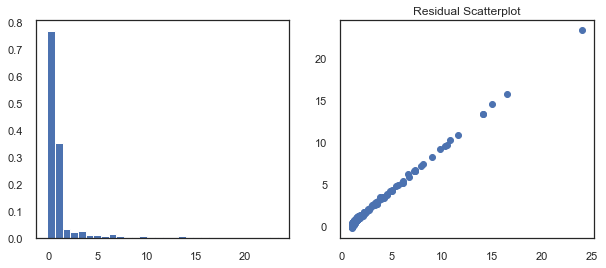

In [33]:
d['grad_recipr'] = 1/d['grad_rate']
checkresiduals(d, 'grad_recipr', features_model)

In [34]:
achievement = pd.read_csv('Student_Achievement.csv', skiprows = 1)
achievement = achievement.rename(columns={'Metric Value - Graduation Rate, 4 year':'gradrate'})

In [35]:
# merge d (which is just the original dataset minus the 2 zero grad_rates)
# with student achievement tab in HS Quality Reports file
newset = d.merge(achievement,on = 'DBN',how = 'inner')

In [36]:
newset = newset.rename(columns={'Student Achievement - Section Score':'SA_score'})

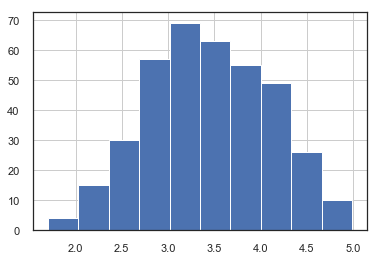

In [37]:
# attempted running model using Student Achievement as target variable instead of grad_rate- too many interactions
newset.SA_score.hist()

In [38]:
newset = newset.drop(['Former ELL', 'Not SWD', 'Asian', 'Hispanic', 'Native American', 'Female'], axis=1)

In [39]:
newset = newset.drop(['prob_ELL', 'prob_SWD', 'prob_Multi-Racial', 'grad_log'], axis=1)

In [40]:
merged_set = newset[['DBN',
'School Name_x',
'total_stud',
'grad_rate',
'prob_Former ELL',
'prob_Not ELL',
'prob_Not SWD',
'prob_Asian',
'prob_Black',
'prob_Hispanic',
'prob_Native American',
'prob_White',
'prob_Female',
'prob_Male',
'prob_Econ Disadv',
'prob_Not Econ Disadv',
'SA_score',
'Metric Score - Percentage Earning 10+ Credits in First Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
'Metric Score - Percentage Earning 10+ Credits in Second Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
'Metric Score - Percentage Earning 10+ Credits in Third Year',
'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
'Metric Score - Average Completion Rate for Remaining Regents',
'Metric Score - Weighted Regents Pass Rate, English',
'Metric Score - Weighted Regents Pass Rate, Math',
'Metric Score - Weighted Regents Pass Rate, Science'
,'Metric Score - Weighted Regents Pass Rate, Global History'
,'Metric Score - Weighted Regents Pass Rate, US History'
,'Metric Score - Graduation Rate, 4 year'
,'Metric Score - Graduation Rate, 6 year'
,'Metric Score - Weighted Diploma Rate, 4 year'
,'Metric Score - Weighted Diploma Rate, 6 year'
,'Metric Score - College and Career Preparatory Course Index'
,'Metric Score - Four-year College Readiness Index'
,'Metric Score - College Readiness Rate including persistence'
,'Metric Score - Postsecondary Enrollment Rate, 6 months After High School'
,'Metric Score - Postsecondary Enrollment Rate, 18 months After High School'
,'Metric Value - Non-Dropout Rate, 4 year'
,'Metric Value - Non-Dropout Rate, 6 year'
]]

In [41]:
print(d.shape, newset.shape, merged_set.shape)

(473, 36) (420, 135) (420, 40)


In [42]:
merged_set.columns

Index(['DBN', 'School Name_x', 'total_stud', 'grad_rate', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Native American', 'prob_White', 'prob_Female',
       'prob_Male', 'prob_Econ Disadv', 'prob_Not Econ Disadv', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
       'Metric Score - Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Average Completion Rate for Remaining Regents',
       'Metric Score - Weighted Regents Pass Rate, English',
       'Metric Score - Weighted Regents Pass Rate, Math',
       'Metric Score - Weigh

In [43]:
merged_set.isna().sum()

DBN                                                                                   0
School Name_x                                                                         0
total_stud                                                                            0
grad_rate                                                                             0
prob_Former ELL                                                                       0
prob_Not ELL                                                                          0
prob_Not SWD                                                                          0
prob_Asian                                                                            0
prob_Black                                                                            0
prob_Hispanic                                                                         0
prob_Native American                                                                  0
prob_White                      

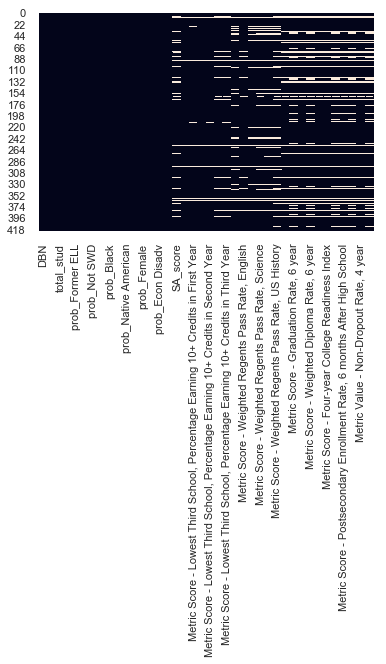

In [44]:
#Checking missing data
sns.heatmap(merged_set.isnull(), cbar=False)

In [45]:
#Replace missing value with 0
merged_set = merged_set.fillna(0)

In [46]:
filtered_cols_m = [
'prob_Former ELL',
'prob_Not ELL',
'prob_Not SWD',
'prob_Asian',
'prob_Black',
'prob_Hispanic',
'prob_White',
'Metric Score - Weighted Regents Pass Rate, Science'
,'Metric Score - Weighted Regents Pass Rate, US History'
,'Metric Score - Four-year College Readiness Index'
]

In [47]:
merged_set[filtered_cols_m].dtypes

prob_Former ELL                                          float64
prob_Not ELL                                             float64
prob_Not SWD                                             float64
prob_Asian                                               float64
prob_Black                                               float64
prob_Hispanic                                            float64
prob_White                                               float64
Metric Score - Weighted Regents Pass Rate, Science       float64
Metric Score - Weighted Regents Pass Rate, US History    float64
Metric Score - Four-year College Readiness Index         float64
dtype: object

In [48]:
features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(merged_set[filtered_cols_m]) ).fit()

features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     42.27
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           4.81e-57
Time:                        12:55:45   Log-Likelihood:                 378.78
No. Observations:                 420   AIC:                            -735.6
Df Residuals:                     409   BIC:                            -691.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.4929      0.232     -2.122      0.034      -0.949      -0.036
prob_Former ELL                                           0.7459      0.106      7.015      0.000       0.537       0.955
prob_Not ELL                                              0.6080      0.049     12.523      0.000       0.513       0.703
prob_Not SWD                                              0.7286      0.073      9.914      0.000       0.584       0.873
prob_Asian                                                0.0891      0.220      0.405      0.686      -0.344       0.522
prob_Black                                                0.0518      0.211      0.245      0.806      -0.363       0.467
prob_Hispanic                                             0.1228      0.210      0.584      0.560      -0.291       0.536
prob_White                                                0.2141      0.212      1.011      0.313      -0.202       0.630
Metric Score - Weighted Regents Pass Rate, Science        0.0033      0.006      0.570      0.569      -0.008       0.015
Metric Score - Weighted Regents Pass Rate, US History     0.0004      0.005      0.074      0.941      -0.010       0.010
Metric Score - Four-year College Readiness Index          0.0076      0.004      2.032      0.043       0.000       0.015
==============================================================================
Omnibus:                       78.425   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.702
Skew:                          -0.929   Prob(JB):                     1.43e-42
Kurtosis:                       5.750   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

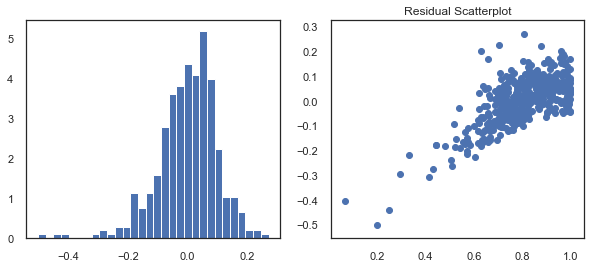

In [49]:
checkresiduals(merged_set, 'grad_rate', features_model)

In [50]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

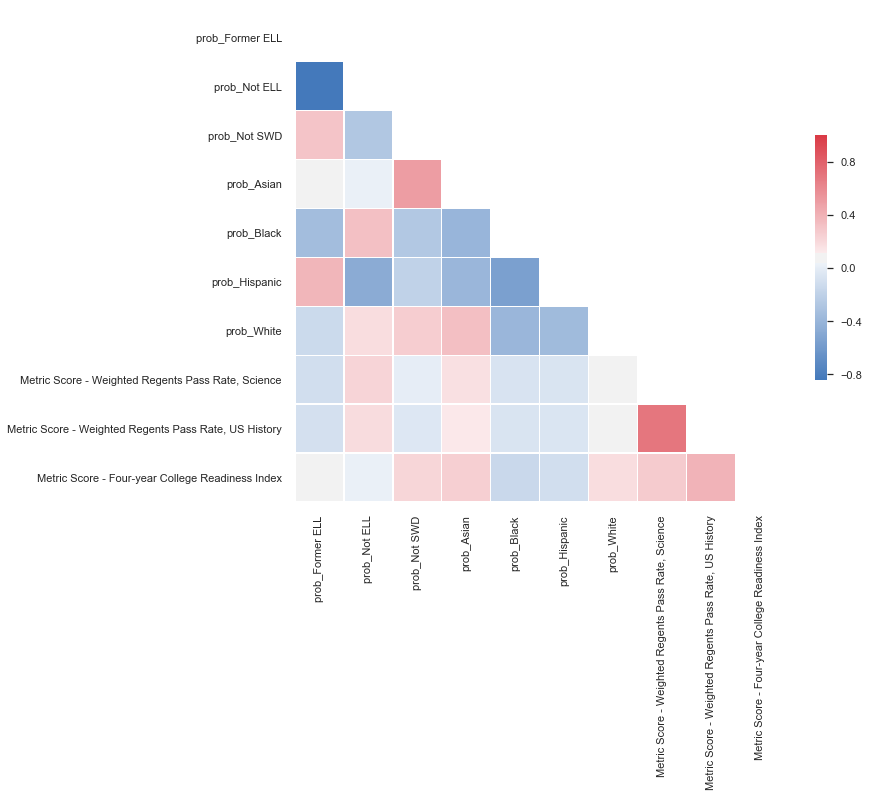

In [51]:
CorrMtx(merged_set[filtered_cols_m].corr(), dropDuplicates = True)

In [52]:
# add Student Quality Review table
sqr = pd.read_csv('SQR_Summary2.csv', skiprows = 1)

In [53]:
# filter columns
sqr = sqr[['DBN', 'Enrollment',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
'Percent Students with Disabilities', 'Percent Self-Contained',
'Economic Need Index', 'Percent in Temp Housing - 4yr',
'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
'Percent Hispanic', 'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate', 'Percent of Students Chronically Absent',
'Teacher Attendance Rate']]

In [54]:
sqr.columns

Index(['DBN', 'Enrollment', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive', 'Average Grade 8 English Proficiency',
       'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index', 'Percent in Temp Housing - 4yr',
       'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate'],
      dtype='object')

In [55]:
print(merged_set.shape, sqr.shape)

(420, 40) (491, 25)


In [56]:
# merge merged_set with sqr (third table)
bigset = merged_set.merge(sqr,on = 'DBN',how = 'inner')

In [57]:
bigset.shape

(420, 64)

In [58]:
#Replace missing value with 0
bigset = bigset.fillna(0)

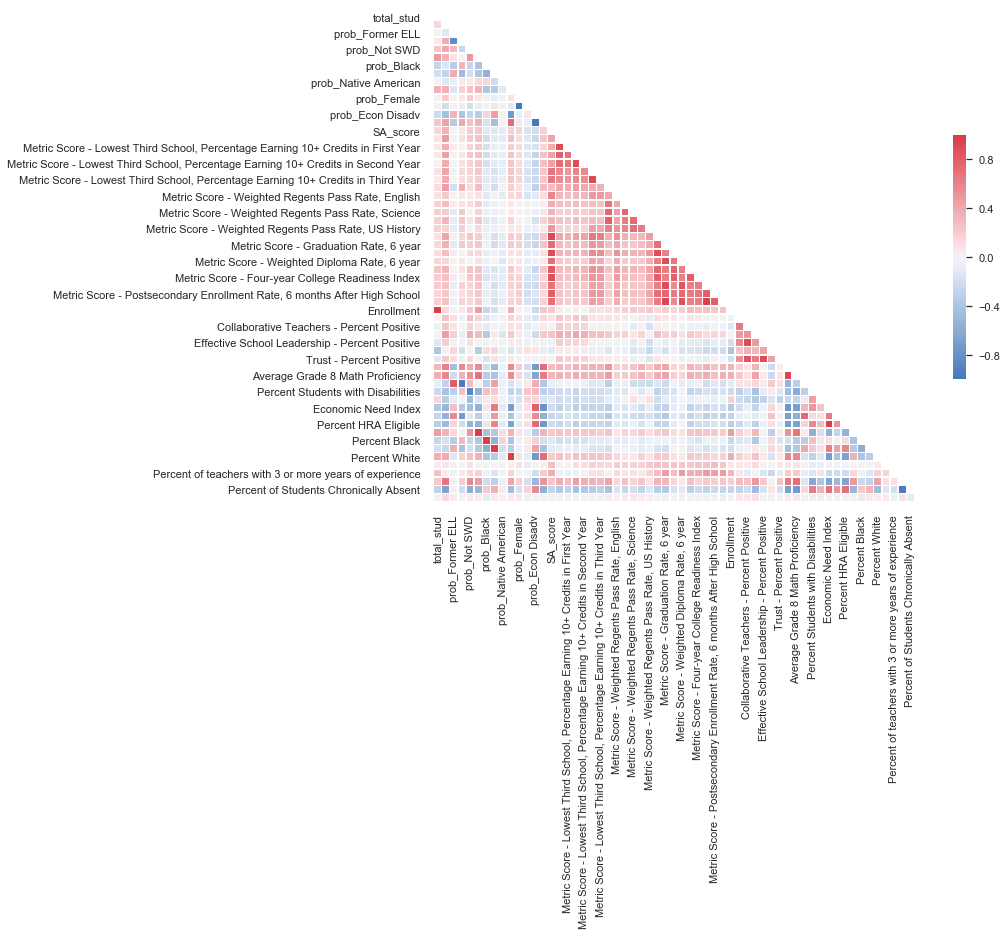

In [59]:
CorrMtx(bigset.corr(), dropDuplicates = True)

In [60]:
bigset.columns

Index(['DBN', 'School Name_x', 'total_stud', 'grad_rate', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Native American', 'prob_White', 'prob_Female',
       'prob_Male', 'prob_Econ Disadv', 'prob_Not Econ Disadv', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
       'Metric Score - Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Average Completion Rate for Remaining Regents',
       'Metric Score - Weighted Regents Pass Rate, English',
       'Metric Score - Weighted Regents Pass Rate, Math',
       'Metric Score - Weigh

In [61]:
bigset.describe()

,total_stud,grad_rate,prob_Former ELL,prob_Not ELL,prob_Not SWD,prob_Asian,prob_Black,prob_Hispanic,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv,SA_score,Metric Score - Percentage Earning 10+ Credits in First Year,"Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year",Metric Score - Percentage Earning 10+ Credits in Second Year,"Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year",Metric Score - Percentage Earning 10+ Credits in Third Year,"Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year",Metric Score - Average Completion Rate for Remaining Regents,"Metric Score - Weighted Regents Pass Rate, English","Metric Score - Weighted Regents Pass Rate, Math","Metric Score - Weighted Regents Pass Rate, Science","Metric Score - Weighted Regents Pass Rate, Global History","Metric Score - Weighted Regents Pass Rate, US History","Metric Score - Graduation Rate, 4 year","Metric Score - Graduation Rate, 6 year","Metric Score - Weighted Diploma Rate, 4 year","Metric Score - Weighted Diploma Rate, 6 year",Metric Score - College and Career Preparatory Course Index,Metric Score - Four-year College Readiness Index,Metric Score - College Readiness Rate including persistence,"Metric Score - Postsecondary Enrollment Rate, 6 months After High School","Metric Score - Postsecondary Enrollment Rate, 18 months After High School",Enrollment,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing - 4yr,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,159.588095,0.804877,0.070357,0.836786,0.823476,0.107476,0.334714,0.445524,0.008143,0.089952,0.494667,0.505310,0.780000,0.220000,3.096119,3.343595,3.267048,3.312833,3.315524,3.116238,3.070738,2.733024,3.332619,2.610190,2.575619,2.505714,2.868786,2.963548,2.651857,3.082214,3.014286,3.067405,3.419881,2.794571,2.905357,2.725405,712.464286,0.855405,0.866167,0.829405,0.821381,0.751833,0.886690,2.437238,2.352476,0.126107,0.174348,0.025526,0.659579,0.098907,0.498969,0.103379,0.348307,0.444752,0.084429,5.190952,0.709333,0.875405,0.358810,0.964714
std,189.362627,0.140192,0.087392,0.206393,0.085390,0.144235,0.246639,0.247852,0.012847,0.134647,0.151379,0.151368,0.140449,0.140449,1.210269,1.166407,1.207703,1.119083,1.159341,1.295109,1.337032,1.355355,1.148232,1.291837,1.216997,1.302213,1.421521,1.333142,1.537991,1.338700,1.555843,1.478975,1.477863,1.519688,1.358066,1.487515,762.764662,0.051734,0.076616,0.052918,0.099120,0.061257,0.054521,0.398799,0.397575,0.190456,0.076537,0.032435,0.155309,0.063818,0.142194,0.140437,0.248275,0.243195,0.129176,3.674879,0.183044,0.055211,0.158441,0.048354
min,5.000000,0.066667,0.000000,0.010000,0.49

In [62]:
filtered_cols_b = [
'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Trust - Percent Positive', 'Average Grade 8 English Proficiency',
       'Average Grade 8 Math Proficiency', 'Percent English Language Learners',
'Percent in Temp Housing - 4yr',
       'Student Attendance Rate',
       'Teacher Attendance Rate'
]

In [63]:
bigset[filtered_cols_b].dtypes

prob_Former ELL                                                float64
prob_Not ELL                                                   float64
prob_Not SWD                                                   float64
SA_score                                                       float64
Metric Score - Percentage Earning 10+ Credits in First Year    float64
Collaborative Teachers - Percent Positive                      float64
Supportive Environment - Percent Positive                      float64
Trust - Percent Positive                                       float64
Average Grade 8 English Proficiency                            float64
Average Grade 8 Math Proficiency                               float64
Percent English Language Learners                              float64
Percent in Temp Housing - 4yr                                  float64
Student Attendance Rate                                        float64
Teacher Attendance Rate                                        float64
dtype:

In [64]:
features_model = sm.OLS(endog=bigset['grad_rate'], exog=sm.add_constant(bigset[filtered_cols_b]) ).fit()

features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     59.77
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           2.94e-89
Time:                        12:56:25   Log-Likelihood:                 465.03
No. Observations:                 420   AIC:                            -900.1
Df Residuals:                     405   BIC:                            -839.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.1148      0.136     -8.219      0.000      -1.381      -0.848
prob_Former ELL                                                 0.5643      0.095      5.944      0.000       0.378       0.751
prob_Not ELL                                                    0.6576      0.088      7.513      0.000       0.486       0.830
prob_Not SWD                                                    0.1798      0.074      2.437      0.015       0.035       0.325
SA_score                                                        0.0098      0.004      2.541      0.011       0.002       0.017
Metric Score - Percentage Earning 10+ Credits in First Year     0.0171      0.004      4.135      0.000       0.009       0.025
Collaborative Teachers - Percent Positive                       0.2140      0.105      2.029      0.043       0.007       0.421
Supportive Environment - Percent Positive                       0.3891      0.120      3.231      0.001       0.152       0.626
Trust - Percent Positive                                       -0.3364      0.168     -2.001      0.046      -0.667      -0.006
Average Grade 8 English Proficiency                             0.1373      0.046      2.986      0.003       0.047       0.228
Average Grade 8 Math Proficiency                               -0.1111      0.040     -2.805      0.005      -0.189      -0.033
Percent English Language Learners                               0.4292      0.095      4.541      0.000       0.243       0.615
Percent in Temp Housing - 4yr                                  -0.3354      0.118     -2.832      0.005      -0.568      -0.103
Student Attendance Rate                                         0.6515      0.127      5.125      0.000       0.402       0.901
Teacher Attendance Rate                                         0.2278      0.083      2.738      0.006       0.064       0.391
==============================================================================
Omnibus:                      147.368   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.182
Skew:                          -1.329   Prob(JB):                    9.65e-216
Kurtosis:                      10.037   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

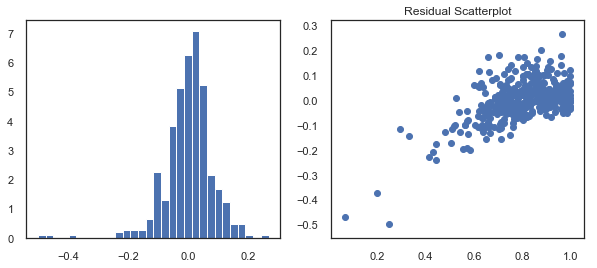

In [65]:
checkresiduals(bigset, 'grad_rate', features_model)

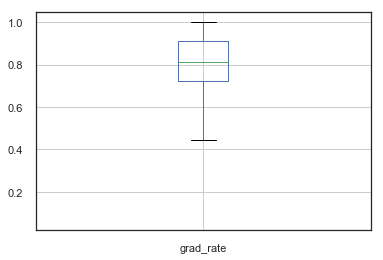

In [66]:
bigset.boxplot(['grad_rate'])

In [67]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(bigset[filtered_cols_b])
poly_columns = poly.get_feature_names(bigset[filtered_cols_b].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=bigset.index)
# scaler.fit(poly_features)
# scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(poly_features, columns=poly_columns, index=bigset.index)

In [68]:
poly_scaled_features.columns

Index(['1', 'prob_Former ELL', 'prob_Not ELL', 'prob_Not SWD', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive', 'Trust - Percent Positive',
       'Average Grade 8 English Proficiency',
       ...
       'Percent English Language Learners^2',
       'Percent English Language Learners Percent in Temp Housing - 4yr',
       'Percent English Language Learners Student Attendance Rate',
       'Percent English Language Learners Teacher Attendance Rate',
       'Percent in Temp Housing - 4yr^2',
       'Percent in Temp Housing - 4yr Student Attendance Rate',
       'Percent in Temp Housing - 4yr Teacher Attendance Rate',
       'Student Attendance Rate^2',
       'Student Attendance Rate Teacher Attendance Rate',
       'Teacher Attendance Rate^2'],
      dtype='object', length=120)

In [69]:
poly_scaled_features = poly_scaled_features.drop(['1'], axis=1)

In [70]:
poly_scaled_features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     10.53
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           9.94e-61
Time:                        13:02:44   Log-Likelihood:                 575.06
No. Observations:                 420   AIC:                            -910.1
Df Residuals:                     300   BIC:                            -425.3
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                   -24.3716     12.905     -1.889      0.060     -49.767       1.024
prob_Former ELL                                                                                          24.7832     15.134      1.638      0.103      -4.999      54.565
prob_Not ELL                                                                                             12.1531      9.897      1.228      0.220      -7.324      31.630
prob_Not SWD                                                                                              5.4702      8.249      0.663      0.508     -10.763      21.704
SA_score                                                                                                  0.1242      0.461      0.270      0.788      -0.782       1.031
Metric Score - Percentage Earning 10+ Credits in First Year                                              -0.3750      0.416     -0.901      0.368      -1.194       0.444
Collaborative Teachers - Percent Positive                                                                -1.4453     12.017     -0.120      0.904     -25.094      22.204
Supportive Environment - Percent Positive                                                                -4.8539     13.082     -0.371      0.711     -30.599      20.891
Trust - Percent Positive                                                                                 16.7919     20.895      0.804      0.422     -24.328      57.912
Average Grade 8 English Proficiency                                                                       1.4721      5.711      0.258      0.797      -9.768      12.712
Average Grade 8 Math Proficiency                                                                         -1.5407      4.666     -0.330      0.742     -10.724       7.642
Percent English Language Learners                                                                         0.8190     11.384      0.072      0.943     -21.583      23.221
Percent in Temp Housing - 4yr                                                                            14.9552     14.768      1.013      0.312     -14.107      44.018
Student Attendance Rate                                                                                   7.0614     12.483      0.566      0.572     -17.503      31.626
Teacher Attendance Rate                                                                                  16.3163     13.890      1.175      0.241     -11.017      43.650
prob_Former ELL^2      

In [150]:
trimmedset = bigset[bigset['grad_rate'] >= .5]

In [151]:
trimmedset.columns

Index(['DBN', 'School Name_x', 'total_stud', 'grad_rate', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Native American', 'prob_White', 'prob_Female',
       'prob_Male', 'prob_Econ Disadv', 'prob_Not Econ Disadv', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
       'Metric Score - Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Average Completion Rate for Remaining Regents',
       'Metric Score - Weighted Regents Pass Rate, English',
       'Metric Score - Weighted Regents Pass Rate, Math',
       'Metric Score - Weigh

In [181]:
# 'prob_Not SWD', 'Trust - Percent Positive', 'Collaborative Teachers - Percent Positive',
filtered_cols_tt = [
'prob_Former ELL',
       'prob_Not ELL', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Supportive Environment - Percent Positive',
       'Average Grade 8 English Proficiency', 'Percent English Language Learners',
'Percent in Temp Housing - 4yr',
       'Student Attendance Rate',
       'Teacher Attendance Rate'
]

In [182]:
features_model = sm.OLS(endog=trimmedset['grad_rate'], exog=sm.add_constant(trimmedset[filtered_cols_tt]) ).fit()

features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     91.10
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           1.63e-96
Time:                        11:15:31   Log-Likelihood:                 534.07
No. Observations:                 410   AIC:                            -1046.
Df Residuals:                     399   BIC:                            -1002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -0.8649      0.108     -7.978      0.000      -1.078      -0.652
prob_Former ELL                                                 0.2975      0.077      3.871      0.000       0.146       0.449
prob_Not ELL                                                    0.5254      0.078      6.778      0.000       0.373       0.678
SA_score                                                        0.0086      0.003      2.728      0.007       0.002       0.015
Metric Score - Percentage Earning 10+ Credits in First Year     0.0180      0.003      5.258      0.000       0.011       0.025
Supportive Environment - Percent Positive                       0.2235      0.078      2.860      0.004       0.070       0.377
Average Grade 8 English Proficiency                             0.0469      0.015      3.174      0.002       0.018       0.076
Percent English Language Learners                               0.4109      0.080      5.105      0.000       0.253       0.569
Percent in Temp Housing - 4yr                                  -0.3683      0.097     -3.810      0.000      -0.558      -0.178
Student Attendance Rate                                         0.6355      0.100      6.339      0.000       0.438       0.833
Teacher Attendance Rate                                         0.2678      0.068      3.931      0.000       0.134       0.402
==============================================================================
Omnibus:                        7.113   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                8.080
Skew:                          -0.208   Prob(JB):                       0.0176
Kurtosis:                       3.548   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

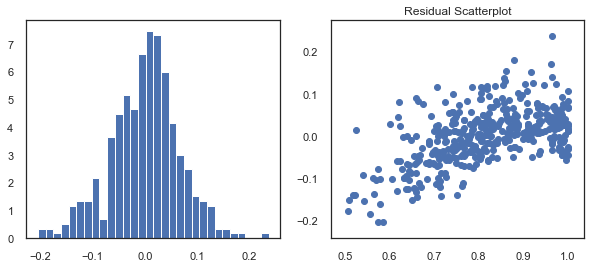

In [183]:
checkresiduals(trimmedset,'grad_rate', features_model)

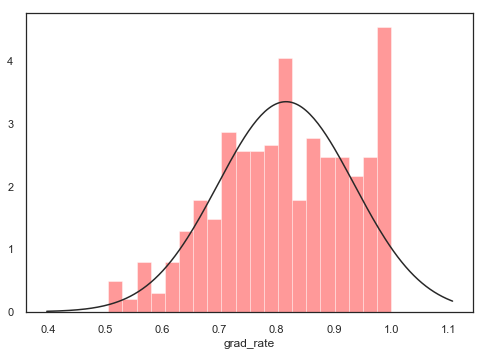

In [155]:
sns.distplot(trimmedset['grad_rate'], fit=norm, bins=20, kde=False, color = 'red')

In [186]:
len(poly_scaled_features.columns)

65

In [187]:
poly_scaled_features_model = sm.OLS(endog=trimmedset['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     18.26
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           9.89e-79
Time:                        11:16:14   Log-Likelihood:                 596.41
No. Observations:                 410   AIC:                            -1061.
Df Residuals:                     344   BIC:                            -795.8
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                    -6.2442      9.465     -0.660      0.510     -24.860      12.372
prob_Former ELL                                                                                          13.0831     10.467      1.250      0.212      -7.504      33.670
prob_Not ELL                                                                                              8.0704      9.162      0.881      0.379      -9.951      26.091
SA_score                                                                                                 -0.2470      0.347     -0.711      0.477      -0.930       0.436
Metric Score - Percentage Earning 10+ Credits in First Year                                               0.3499      0.316      1.107      0.269      -0.272       0.971
Supportive Environment - Percent Positive                                                                -3.3634      7.729     -0.435      0.664     -18.565      11.839
Average Grade 8 English Proficiency                                                                       1.0030      1.649      0.608      0.543      -2.241       4.247
Percent English Language Learners                                                                         8.0147      9.282      0.863      0.388     -10.242      26.271
Percent in Temp Housing - 4yr                                                                            -2.2224     10.246     -0.217      0.828     -22.375      17.930
Student Attendance Rate                                                                                  -6.1986      8.733     -0.710      0.478     -23.374      10.977
Teacher Attendance Rate                                                                                   9.6926      9.892      0.980      0.328      -9.763      29.148
prob_Former ELL^2                                                                                         0.2259      0.954      0.237      0.813      -1.650       2.102
prob_Former ELL prob_Not ELL                                                                              2.6050      1.584      1.645      0.101      -0.510       5.720
prob_Former ELL SA_score                                                                                  0.0757      0.120      0.630      0.529      -0.161       0.312
prob_Former ELL Metric Score - Percentage Earning 10+ Credits in First Year                               0.0801      0.107      0.749      0.454      -0.130       0.290
prob_Former ELL Support

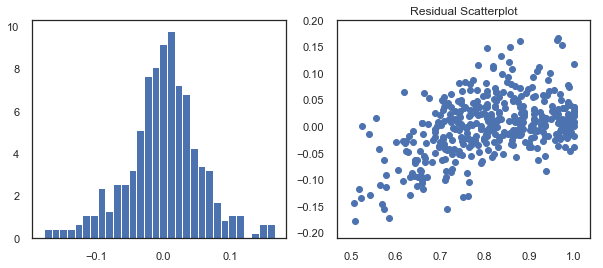

In [170]:
checkresiduals(trimmedset,'grad_rate', poly_scaled_features_model)

In [173]:
trimmedset[filtered_cols_t].describe()

,prob_Former ELL,prob_Not ELL,SA_score,Metric Score - Percentage Earning 10+ Credits in First Year,Supportive Environment - Percent Positive,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent in Temp Housing - 4yr,Student Attendance Rate,Teacher Attendance Rate
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,0.070878,0.840707,3.115951,3.363756,0.830659,2.445293,2.360439,0.123888,0.097446,0.877122,0.964683
std,0.087657,0.204491,1.211328,1.160724,0.052468,0.399995,0.398953,0.189194,0.063282,0.054410,0.048895
min,0.000000,0.010000,0.000000,0.000000,0.660000,1.730000,1.860000,0.000000,0.003000,0.720000,0.000000
25%,0.020000,0.810000,2.772500,2.670000,0.790000,2.220000,2.100000,0.026000,0.056000,0.840000,0.960000
50%,0.050000,0.900000,3.340000,3.550000,0.830000,2.340000,2.230000,0.064000,0.085000,0.880000,0.970000
75%,0.090000,0.960000,3.870000,4.287500,0.870000,2.560000,2.467500,0.127750,0.128000,0.920000,0.970000
max,0.600000,1.000000,4.990000,4.990000,1.000000,4.010000,4.170000,0.923000,0.416000,0.980000,0.990000


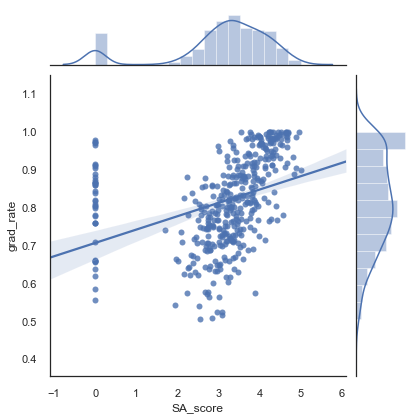

In [431]:
sns.jointplot(x='SA_score', y='grad_rate', data=biggerset, kind="reg")

In [432]:
betterset = trimmedset[trimmedset['SA_score'] > 0]

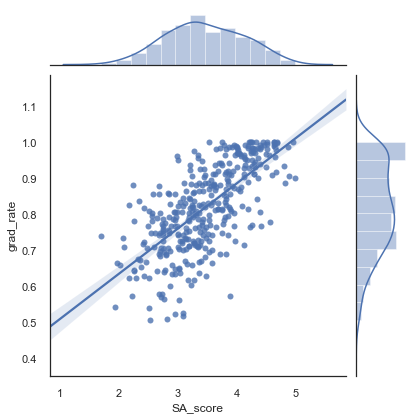

In [433]:
sns.jointplot(x='SA_score', y='grad_rate', data=trimmedset, kind="reg")

In [179]:
trimmedset.columns

Index(['DBN', 'School Name_x', 'total_stud', 'grad_rate', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Native American', 'prob_White', 'prob_Female',
       'prob_Male', 'prob_Econ Disadv', 'prob_Not Econ Disadv', 'SA_score',
       'Metric Score - Percentage Earning 10+ Credits in First Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in First Year',
       'Metric Score - Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Second Year',
       'Metric Score - Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Lowest Third School, Percentage Earning 10+ Credits in Third Year',
       'Metric Score - Average Completion Rate for Remaining Regents',
       'Metric Score - Weighted Regents Pass Rate, English',
       'Metric Score - Weighted Regents Pass Rate, Math',
       'Metric Score - Weigh

In [ ]:
Student Attendance Rate

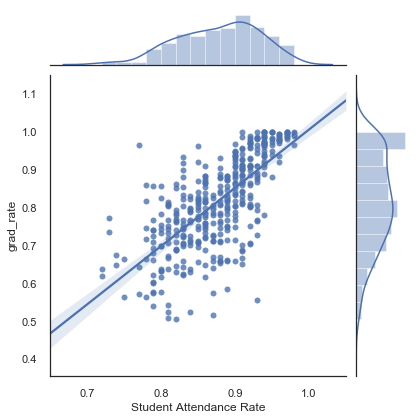

In [180]:
sns.jointplot(x='Student Attendance Rate', y='grad_rate', data=trimmedset, kind="reg")

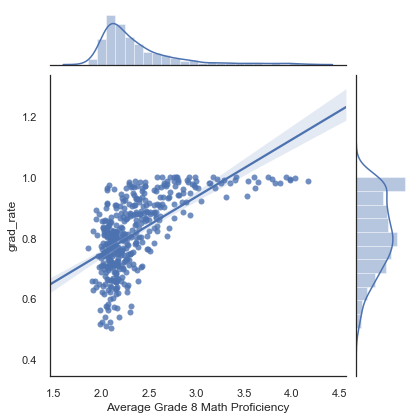

In [436]:
sns.jointplot(x='Average Grade 8 Math Proficiency', y='grad_rate', data=biggerset, kind="reg")

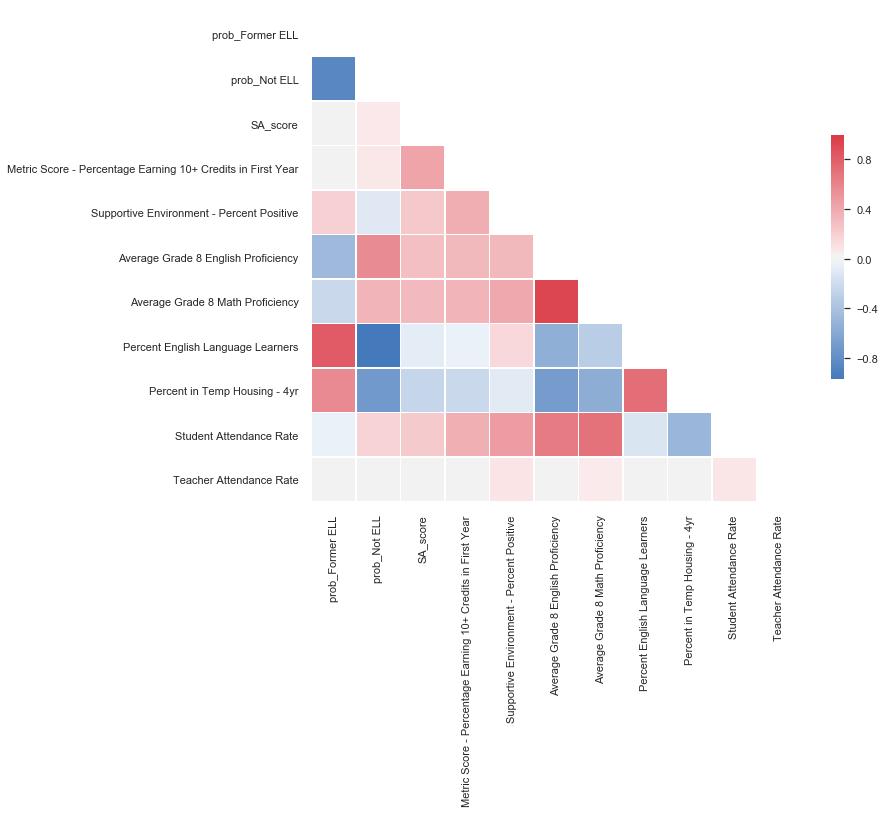

In [445]:
CorrMtx(biggerset[filtered_cols].corr(), dropDuplicates = True)

In [ ]:
scaler = StandardScaler()
scaler.fit(merged_set[filtered_cols])
scaled_features = scaler.transform(merged_set[filtered_cols])

scaled_features_dataset = pd.DataFrame(scaled_features, columns=filtered_cols, index=dataset.index)
scaled_features_dataset.head()

In [ ]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(merged_set[filtered_cols])
poly_columns = poly.get_feature_names(merged_set[filtered_cols].columns)
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=dataset.index)
scaler.fit(poly_features)
scaled_features = scaler.transform(poly_features)

poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_columns, index=dataset.index)
poly_scaled_features.head(15)

poly_scaled_features['1'].describe()
# poly_scaled_features = poly_scaled_features.drop(['1'], axis=1)

In [298]:
# poly_scaled_features_model = sm.OLS(endog=df['price_log'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model = sm.OLS(endog=merged_set['grad_rate'], exog=sm.add_constant(poly_scaled_features)).fit()

poly_scaled_features_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              grad_rate   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     11.31
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           3.96e-55
Time:                        15:56:09   Log-Likelihood:                 465.76
No. Observations:                 420   AIC:                            -799.5
Df Residuals:                     354   BIC:                            -532.9
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================================
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                        0.8049      0.004    189.705      0.000       0.797       0.813
1                                                                                                          1.44e-14   3.68e-14      0.391      0.696    -5.8e-14    8.68e-14
prob_Former ELL                                                                                              1.3971      0.600      2.327      0.021       0.217       2.578
prob_Not ELL                                                                                                 0.1019      0.671      0.152      0.879      -1.217       1.421
prob_Not SWD                                                                                                 0.0057      0.321      0.018      0.986      -0.625       0.636
prob_Asian                                                                                                   0.3202      1.694      0.189      0.850      -3.012       3.652
prob_Black                                                                                                   0.5116      2.675      0.191      0.848      -4.750       5.773
prob_Hispanic                                                                                                0.3165      2.744      0.115      0.908      -5.079       5.712
prob_White                                                                                                   0.5620      1.424      0.395      0.693      -2.238       3.362
Metric Score - Weighted Regents Pass Rate, Science                                                           0.2304      0.369      0.625      0.533      -0.495       0.956
Metric Score - Weighted Regents Pass Rate, US History                                                       -0.3223      0.427     -0.754      0.451      -1.163       0.518
Metric Score - Four-year College Readiness Index                                                             0.2579      0.301      0.858      0.391      -0.333       0.849
prob_Former ELL^2                                                                                           -0.0358      0.041     -0.867      0.387      -0.117       0.045
prob_Former ELL prob_Not ELL                                                                                -0.0307      0.036     -0.847      0.397      -0.102       0.041
prob_Former ELL prob_Not SWD                                                                                -0.3498      0.156     -2.241     